In [8]:
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy

In [9]:
#read_band Function reads tif files(tif files are the ) and retuns the raster data in ndarry format.  
def read_band(band):
    with rio.open(band) as src:
        band = src.read(1).astype('float64')
    return band
#generatepng_ph function reads the raster data and generates image we use matplotlib to generate image. 
def generatepng_ph(values):
    cmap = mpl.colors.ListedColormap(["#A50026", "#D73027", "#F46D43", "#FDAE61", "#FEE08B", "#FFFFBF", "#D9EF8B", "#A6D96A", "#66BD63", "#1A9850", "#006837"])
    bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    plt.imshow(values, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.show()
    return
def generatepng_annomaly(values):
    cmap = mpl.colors.ListedColormap(["#A50026","#000000", "#006837"])
    bounds = [-1,-0.0001,1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    plt.imshow(values, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.show()
    return

In [10]:
date1 = "./data/2019-06-11_msavi2.tif"
date2 = "./data/2019-06-14_msavi2.tif"
date3 = "./data/2019-06-21_msavi2.tif"
val1 = read_band(date1)
val2 = read_band(date2)
val3 = read_band(date3)

In [11]:
change1 = val2 - val1
change2 = val3 - val2


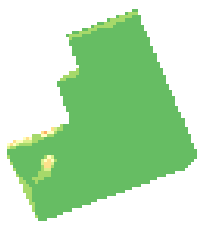

In [14]:
generatepng_ph(val1)

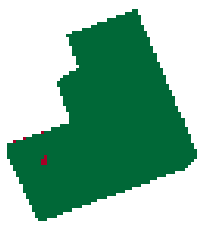

In [12]:
generatepng_annomaly(change1)

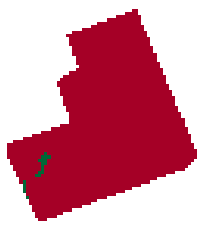

In [13]:
generatepng_annomaly(change2)